In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
X , y= make_blobs(n_samples = 250,centers = 5,n_features=2,random_state=86)

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5,random_state = 86).fit(X)
z = kmeans.labels_

D:\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\anaconda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
D:\anacon

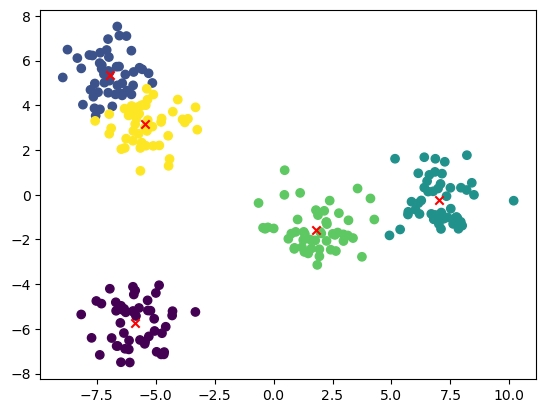

In [4]:
center = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1],c = z)
plt.scatter(center[:,0],center[:,1],marker='x',c = 'red')
plt.show()

### 已知标签

In [6]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y,z)
# Rand指数（RI）衡量两个聚类结果的相似度，是比较聚类结果和真实类别之间相似程度的指标
# 调整后的Rand指数（Adjusted Rand Score, ARI）对RI进行了校正
# 考虑了聚类结果偶然相似的情况，取值范围再-1 到 1之间
# 值为1表示两个聚类结果完全一致，值为0表示聚类结果相似程度与随机分配差不多
# 值为-1表示聚类结果完全不一致

0.8399778843662463

In [7]:
from sklearn.metrics import adjusted_mutual_info_score
adjusted_mutual_info_score(y,z)
# 互信息（Mutual Information, MI）用于衡量两个随机变量的依赖程度
# 在聚类评估中可衡量两个聚类结果的相似度
# 调整后的互信息（Adjusted Mutual Information, AMI）对MI进行了校正
# 消除了聚类大小和类别数量等因素对结果的影响，取值范围在0到1之间
# 值1表示两个聚类结果完全一致，值为0表示两个聚类结果相互独立（无相似性）

0.868166941986682

In [8]:
from sklearn.metrics import v_measure_score
v_measure_score(y,z)
# V-Measure是基于互信息的聚类评估指标，它结合了聚类的同质性（homogeneity）和完整性（completeness,同一类别的样本都被分配到同一个簇中）
# 取值范围在0到1之间，值为1表示聚类结果完美，同质性和完整性都达到了最佳

0.8708566751645336

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

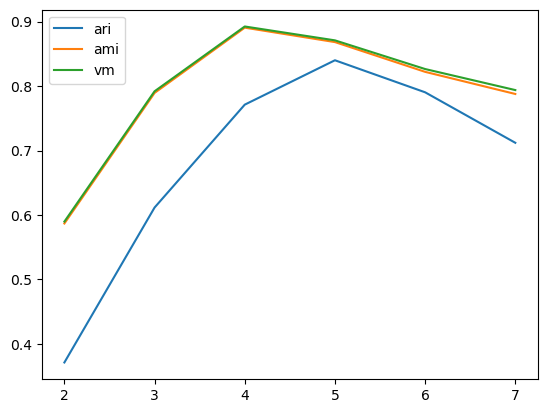

In [9]:
ari_curve = []
ami_curve = []
vm_curve = []
clus = [2,3,4,5,6,7]
for n_clusters in clus:
    clusterer = KMeans(n_clusters = n_clusters,random_state = 86).fit(X)
    z = clusterer.labels_
    # 获得KMeans聚类后的预测标签z
    ari_curve.append(adjusted_rand_score(y,z))
    ami_curve.append(adjusted_mutual_info_score(y,z))
    vm_curve.append(v_measure_score(y,z))

plt.plot(clus,ari_curve,label = 'ari')
plt.plot(clus,ami_curve,label = 'ami')
plt.plot(clus,vm_curve,label = 'vm')
plt.legend()
plt.show()

### 未知标签

In [11]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters = 5,random_state = 86).fit(X)
cluster_labels = kmeans.labels_
si = silhouette_score(X,cluster_labels)
# 使用silhouette_score计算数据X基于聚类标签cluster_labels的轮廓系数结果存储在si中
si

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.6012677995872586

In [12]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

def show_silhouette_plot(model, X):
    for n_clusters in [2, 3, 4, 5, 6, 7]:
        fig, (pic1, pic2) = plt.subplots(1, 2)
        fig.set_size_inches(15, 5)
        model.n_clusters = n_clusters
        clusterer = model.fit(X)
        cluster_labels = clusterer.labels_
        centers = clusterer.cluster_centers_
        silhouette_avg = silhouette_score(X, cluster_labels)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 1
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            pic1.fill_betweenx(np.arange(y_lower, y_upper), ith_cluster_silhouette_values, facecolor = color)
            pic1.text(-0.02, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 1

        pic1.axvline(x = silhouette_avg, color = 'red', linestyle = "--")
        pic1.set_title("score: {0}".format(silhouette_avg))

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        pic2.scatter(X[:,0], X[:,1], marker = 'o', c = colors)
        pic2.scatter(centers[:, 0], centers[:, 1], marker = 'x', c = 'red', alpha = 1, s = 200)
        pic2.set_title("k: {0}".format(n_clusters))

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

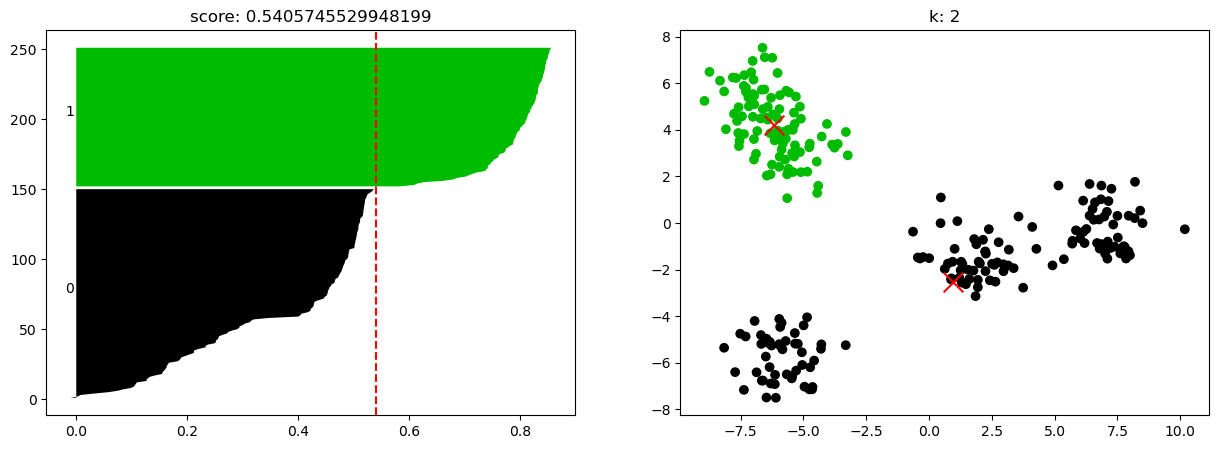

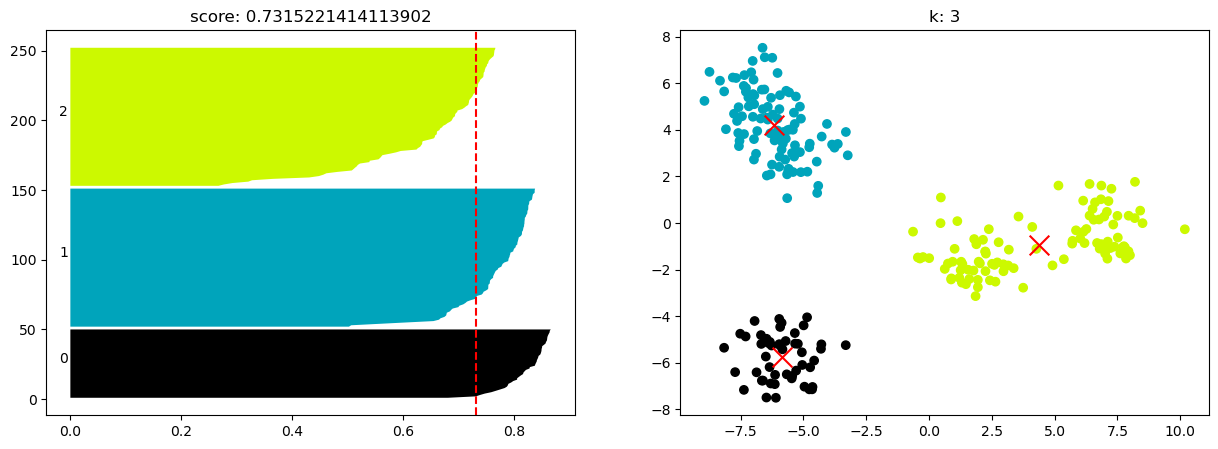

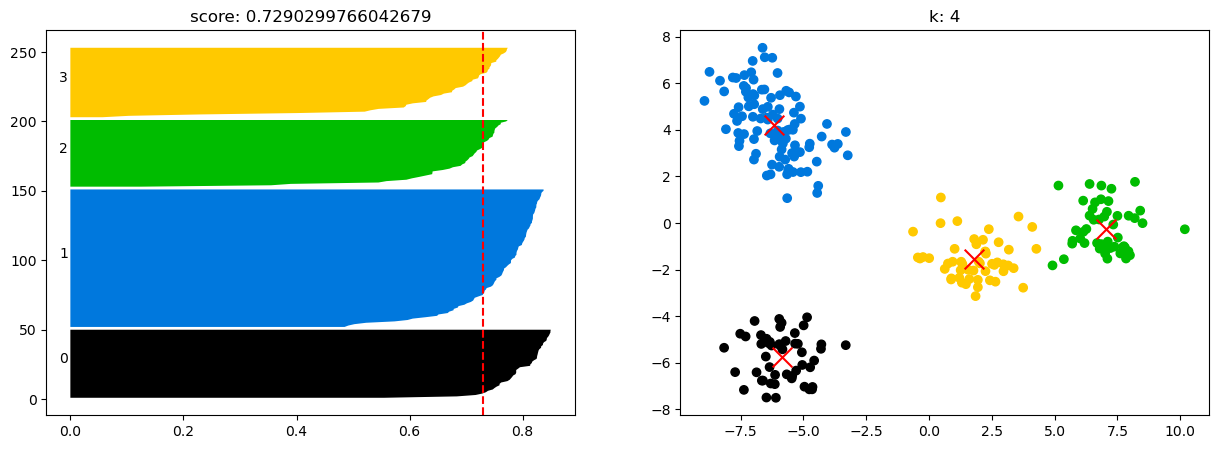

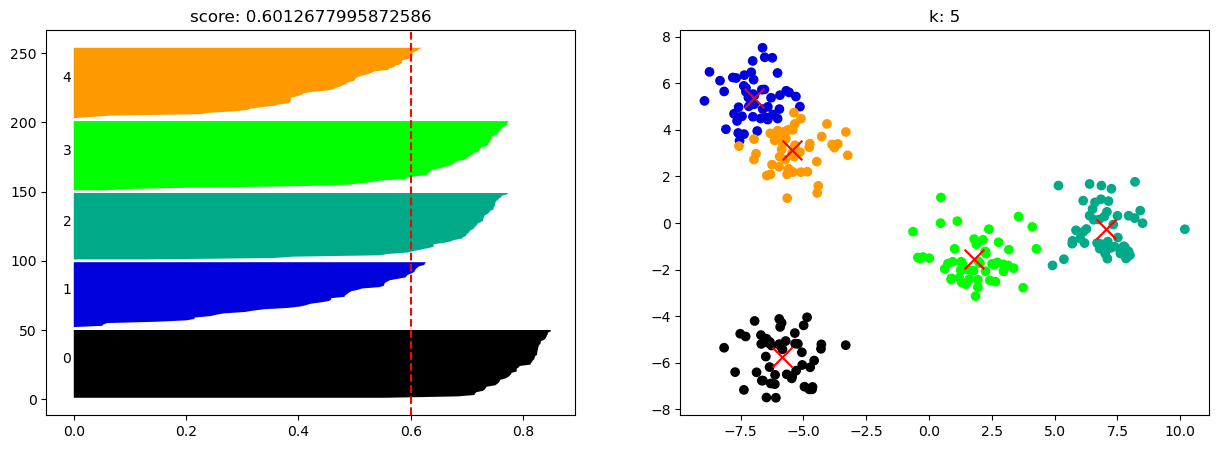

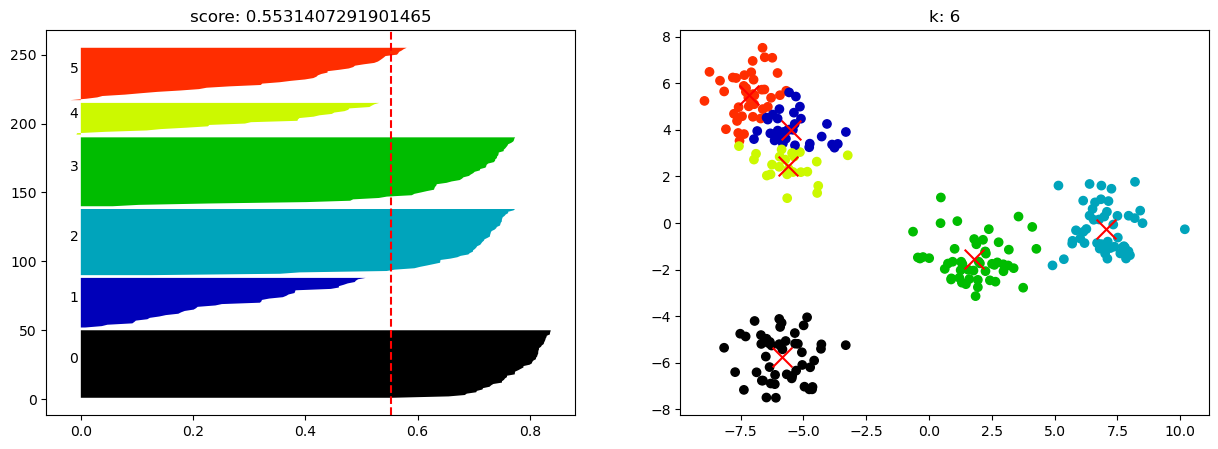

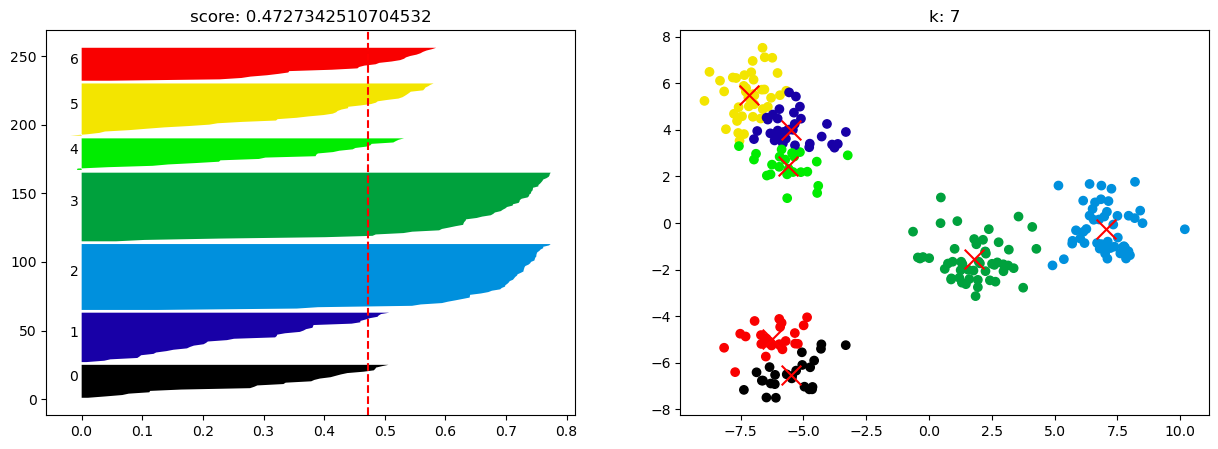

In [13]:
show_silhouette_plot(kmeans, X)

In [28]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X,y)

1301.9979832906324

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

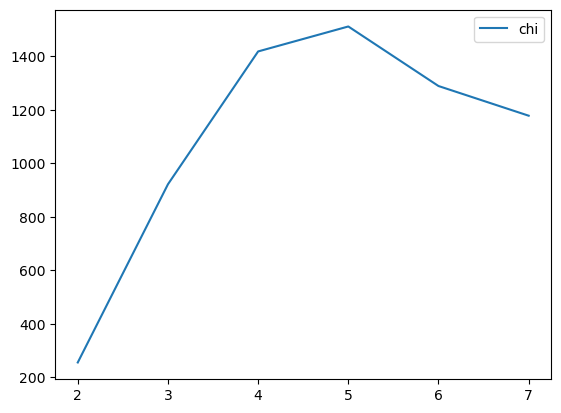

In [34]:
chi_curve = []

clus = [2,3,4,5,6,7]
for n_clusters in clus:
    clusterer = KMeans(n_clusters = n_clusters,random_state = 86).fit(X)
    z = clusterer.labels_
    chi_curve.append(calinski_harabasz_score(X,z))

plt.plot(clus,chi_curve,label='chi')
plt.legend()
plt.show()